In [34]:
import pickle
import pathlib
import numpy as np
import pandas as pd
from scipy.stats import anderson

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

In [35]:
DATA_DIR = pathlib.Path.cwd().parent / 'data'
clean_data_path = DATA_DIR / 'processed' / 'ames_clean.pkl'
print(DATA_DIR)

c:\Users\marce\Desktop\Machine learning\ames_AndreVictor\data


In [36]:
clean_data_path = DATA_DIR / 'processed' / 'ames_clean.pkl'

with open(clean_data_path, 'rb') as file:
    data = pickle.load(file)

## Combining Year sold and month sold into one column

In [37]:
data["TimeSold"] = data["Yr.Sold"] + data["Mo.Sold"] / 12
data.TimeSold

0       2010.416667
1       2010.500000
2       2010.500000
3       2010.333333
4       2010.250000
           ...     
2925    2006.250000
2926    2006.500000
2927    2006.583333
2928    2006.333333
2929    2006.916667
Name: TimeSold, Length: 2877, dtype: float64

## Plotting timeSold Against salePrice

Let's plot the time sold against the salePrice to check any relevant tendencies. We should verify if any macroeconomic factors such as the 2008 housing crisis has any impact in our target variable in order to adjust the models and compensate for these tendencies caused by events out of our control.

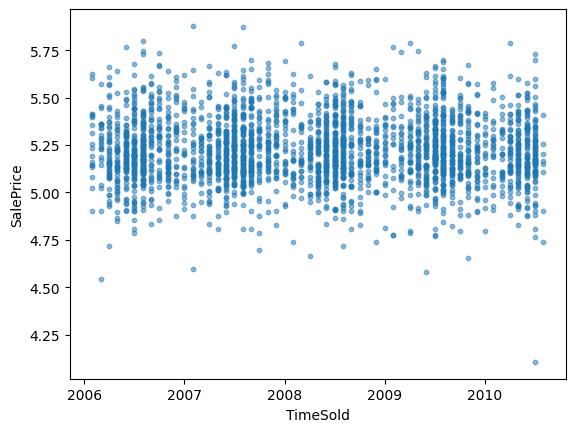

In [44]:
import matplotlib.pyplot as plt

plt.scatter(data["TimeSold"], data["SalePrice"], alpha=0.5, s=10)
plt.xlabel("TimeSold")
plt.ylabel("SalePrice")
plt.show()

The housing prices do not appear to follow any apparent tendency. But from the varying oppacity the amount of houses sold seems to have some seasonality, let's verify it.

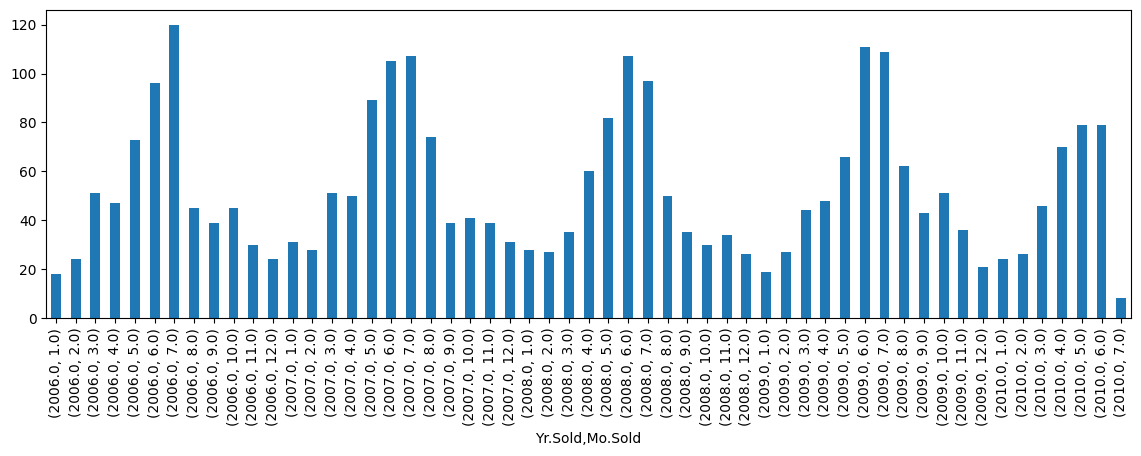

In [45]:
data.groupby(['Yr.Sold','Mo.Sold']).SalePrice.count().plot(kind='bar', figsize=(14,4))
plt.show()

It is an interesting phenomenon, the housing prices do follow a seasonal tendency, but due to this feature's cardinality we are unable to use it in the models. 